#**Import Library**

In [25]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
import math

from IPython.display import Image
from datetime import timedelta
from scipy import optimize
from scipy import stats
from mpl_toolkits.mplot3d import axes3d
from matplotlib import pyplot as plt
from datetime import timedelta, datetime

%matplotlib inline

#**Load Dataset**

In [26]:
dataset = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Iran/Iran1973-2022.csv"
df = pd.read_csv(dataset)
df.head(5)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2022-11-03T02:03:13.887Z,27.7781,57.4801,10.0,4.1,mb,39.0,85.0,3.045,0.51,...,2023-01-12T23:11:06.040Z,"81 km NNE of M?n?b, Iran",earthquake,7.40,1.883,0.112,22.0,reviewed,us,us
1,2022-11-02T08:07:03.814Z,26.3522,54.8717,10.0,4.1,mb,31.0,114.0,1.846,0.91,...,2023-01-12T23:11:36.040Z,southern Iran,earthquake,6.24,1.868,0.158,11.0,reviewed,us,us
2,2022-10-31T16:08:38.061Z,25.9532,60.3815,10.0,4.1,mb,20.0,136.0,3.907,0.88,...,2023-01-12T23:11:28.040Z,"34 km SSE of N?kshahr, Iran",earthquake,7.70,1.913,0.175,10.0,reviewed,us,us
3,2022-10-30T00:49:05.189Z,27.3165,55.6221,10.0,4.0,mb,36.0,122.0,2.419,0.82,...,2023-01-12T23:11:16.040Z,"66 km WNW of Bandar Abbas, Iran",earthquake,7.33,1.730,0.105,24.0,reviewed,us,us
4,2022-10-24T11:21:08.588Z,26.8864,55.3557,10.0,4.3,mb,36.0,93.0,2.079,0.38,...,2023-01-03T15:23:45.040Z,"59 km NE of Bandar-e Lengeh, Iran",earthquake,9.87,1.935,0.111,23.0,reviewed,us,us


In [27]:
print('Total Jumlah Kejadian Gempa:',df.shape[0])
df.head()

Total Jumlah Kejadian Gempa: 7897


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2022-11-03T02:03:13.887Z,27.7781,57.4801,10.0,4.1,mb,39.0,85.0,3.045,0.51,...,2023-01-12T23:11:06.040Z,"81 km NNE of M?n?b, Iran",earthquake,7.40,1.883,0.112,22.0,reviewed,us,us
1,2022-11-02T08:07:03.814Z,26.3522,54.8717,10.0,4.1,mb,31.0,114.0,1.846,0.91,...,2023-01-12T23:11:36.040Z,southern Iran,earthquake,6.24,1.868,0.158,11.0,reviewed,us,us
2,2022-10-31T16:08:38.061Z,25.9532,60.3815,10.0,4.1,mb,20.0,136.0,3.907,0.88,...,2023-01-12T23:11:28.040Z,"34 km SSE of N?kshahr, Iran",earthquake,7.70,1.913,0.175,10.0,reviewed,us,us
3,2022-10-30T00:49:05.189Z,27.3165,55.6221,10.0,4.0,mb,36.0,122.0,2.419,0.82,...,2023-01-12T23:11:16.040Z,"66 km WNW of Bandar Abbas, Iran",earthquake,7.33,1.730,0.105,24.0,reviewed,us,us
4,2022-10-24T11:21:08.588Z,26.8864,55.3557,10.0,4.3,mb,36.0,93.0,2.079,0.38,...,2023-01-03T15:23:45.040Z,"59 km NE of Bandar-e Lengeh, Iran",earthquake,9.87,1.935,0.111,23.0,reviewed,us,us


In [28]:
# daftar jenis magnitude
df['magType'].value_counts()

mb       6803
ml        296
mblg      272
mwc       190
mww       107
mw         95
ms         69
mwb        38
md         15
mwr         7
mb_lg       2
m           2
Name: magType, dtype: int64

In [29]:
mag_keep = np.asarray(df['magType'].value_counts().head(6).index)
mag_keep = mag_keep.astype(str)

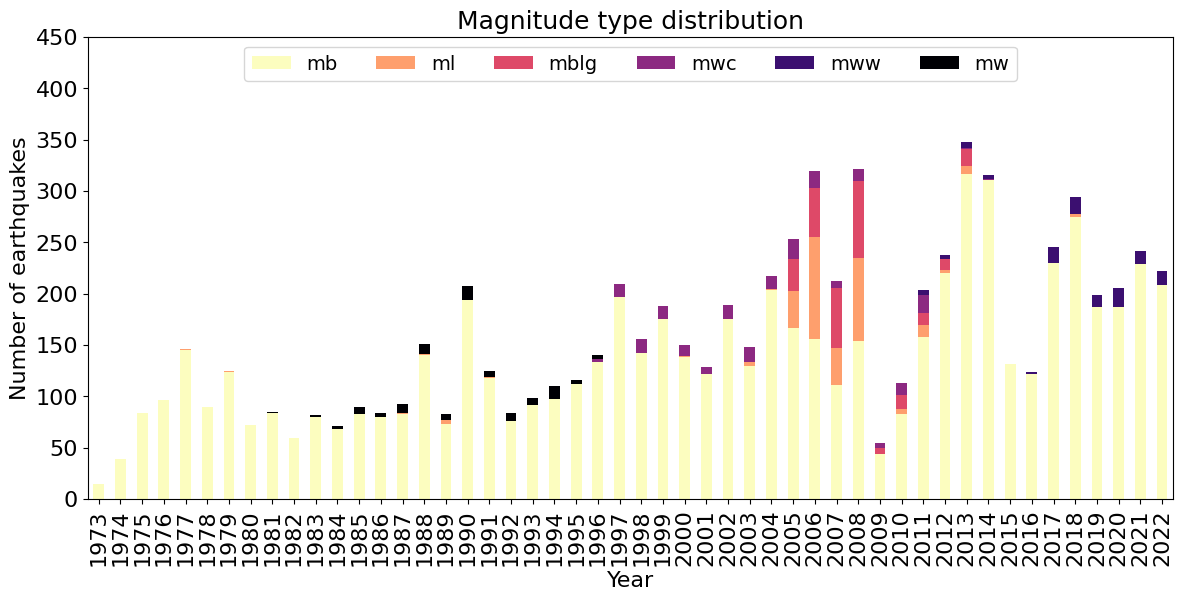

In [30]:
# Settings for all figures
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['font.size'] = 16
plt.rcParams['legend.fontsize'] = 14

df['dt_time'] = df['time'].apply(
    lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%S.%fZ'))

# Add an additional column for the year
df['year'] = df['dt_time'].apply(lambda x: x.year)

# Groupby year
df_cut = df[['year', 'magType']]
df_magType = df_cut.groupby('year')['magType'].value_counts().unstack()

# Keep only the top 6 magnitude types for plotting
df_magType = df_magType[mag_keep]

# Plot the dataFrame as a stacked bar chart
ax = df_magType.plot(kind='bar', stacked=True,
                     colormap='magma_r', figsize=(14,6))
ax.set_ylim([0, 450])
ax.legend(loc='upper center', ncol=6)
plt.xlabel('Year'), plt.ylabel('Number of earthquakes')
plt.title('Magnitude type distribution')
plt.show()

In [31]:
# Cut out years 1970 - 1982
df = df[df.year > 1968]

# Print the minimum year in the column
print("Earliest year of data:",min(df['year']))

# Total number of earthquakes
N_tot = df['mag'].count()
print('Total Jumlah EQ:', N_tot)

Earliest year of data: 1973
Total Jumlah EQ: 7897


#**Gutenberg–Richter Law**

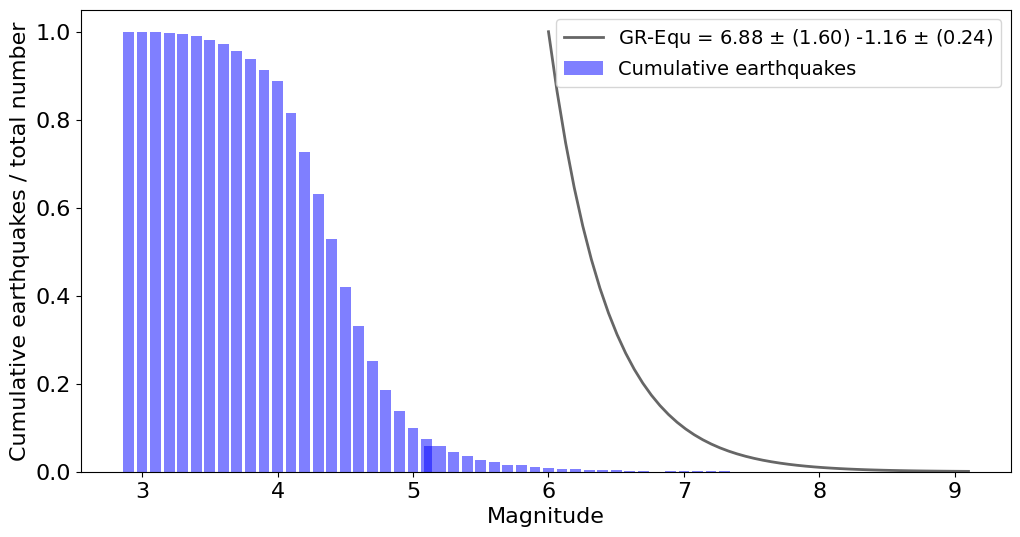

In [32]:
# Number of earthquakes by magnitude
mag_tot = df['mag'].value_counts()
mag_tot.sort_index(axis=0, inplace=True)

# Convert the indices of the Series to an np.ndarray
mags = np.asarray(mag_tot.index)

# between 6.0 and 9.1 (step=0.1)
mags_all = np.linspace(6.0,9.1,num=32)


magnitudes = np.arange(6,9,0.5)
counts = np.zeros(magnitudes.shape[0])

# compute the number of events with magnitude M >= m
i = 0
for m in magnitudes:
    counts[i] = df[df['mag'] >= m]['mag'].count()
    i += 1

# normalize
norm = np.sum(counts)
counts_n = counts/norm

# filter by removing empty data
counts_n_f = counts_n[counts_n!=0]
magnitudes_f = magnitudes[counts_n!=0]

# Add values for missing magnitudes
#mag_add = pd.Series(data=np.zeros(len(mags_miss)), index = mags_miss)
#mag_tot = pd.concat([mag_tot, mag_add])
mag_tot = pd.concat([mag_tot])
mag_tot.sort_index(axis=0, inplace=True)

mag_Ntot = np.cumsum(mag_tot.values[::-1])[::-1]

# Plot Gutenberg-Richter relationship: N = 10**(a-bM)
a = np.log10(1)+6
M = np.linspace(6, 9.1)
N = np.power(10, (a-M))

# compute linear regression
reg = stats.linregress(magnitudes_f, np.log10(counts_n_f))


label = r'GR-Equ = {:.2f} $\pm$ ({:.2f})'.format(reg.intercept, reg.intercept_stderr) + r' {:.2f} $\pm$ ({:.2f})'.format(reg.slope, reg.stderr)

plt.figure(figsize=(12,6))
ax1 = plt.bar(mag_tot.index, mag_Ntot/N_tot,
              width=0.08, color='blue', alpha=0.5,
              label='Cumulative earthquakes')
ax2 = plt.plot(M, N, 'k', linewidth = 2, alpha=0.6,
         label=label)

plt.ylabel('Cumulative earthquakes / total number')
plt.xlabel('Magnitude')
plt.legend()
plt.show()